In [1304]:
import numpy as np
import random
import math
import time
import copy
import sys
import matplotlib.pyplot as plt

In [508]:
"""
the knights are a list. Where the last entry is less than the first. And each entry sums to a fibonacci number. 
The number of entries starts at 1 and goes until N, the number of knights

The key is the reduce the number of possibilities dramatically

create dictionary of fib numbers, key is number, True if fib, else False.
""" 

# Create a sequence until you reach or exceed a number
def fibonacci_sequence(number):
    sequence = [0,1]
    while sequence[-1] < number:
        sequence.append(sequence[-1]+sequence[-2])
    return sequence

def fib_set(number):
    return set(fibonacci_sequence(number+(number-1))[1:])
    
def is_fibonacci(number):
    sequence = fibonacci_sequence(number)
    if number in sequence:
        return True
    else:
        return False

In [10]:
print(is_fibonacci(13))

True


In [89]:
def check_configuration(K,N):
    if (K[0] > K[-1]) == True:
        for i in range(1,N):
            if is_fibonacci(K[i] + K[i-1]) == True:
                pass
            else:
                return False
        return True
    else:
        return False
        
def permute_combinations(K):
    return random.shuffle(K)

def solve_knights(N):
    solved = False
    knights = list(range(N+1))[1:]
#     print(knights)
    while solved != True:
        permute_combinations(knights)
#         print(knights)
        solved = check_configuration(knights,N)
    return knights

In [188]:
a = list(range(7))[1:]
print(a)
print(random.shuffle(a))
for _ in range(10):
#     split = random.choice(range(0, len(a)))
    split = random.choice(range(8))
    print(split)

[1, 2, 3, 4, 5, 6]
None
3
5
7
2
5
1
7
7
0
7


In [91]:
# Check particular constellation
# result = check_configuration([4,1,2,3],4)
# print(result)

In [190]:
tic = time.time()
solution = solve_knights(3)
toc = time.time()
print('Computation took {} seconds. Solution is {}'.format(((toc-tic)/60),solution))

Computation took 1.9828478495279947e-06 seconds. Solution is [3, 2, 1]


# Evolutionary Algorithm

In [456]:
"""
N = Number of knights
K = the list of knights
P = Population

Mutate randomly swaps two knights

"""

class Individual(object):
    def __init__(self,N,K):
        self.N = N
        self.K = K
        
    @property
    def fitness(self):
        correct = 0
        for i in range(1,self.N):
            if is_fibonacci(self.K[i] + self.K[i-1]) == True:
                correct += 1
#         print('correct',correct)
        return correct / (self.N-1)

    @staticmethod
    def fix_ends(N,K):
        one = random.choice([0,N-1])
        two = random.choice(list(range(N-1)))
        K[one],K[two] = K[two],K[one]
        return K
    
    def mutate(self):
        # randomly swap two knights. randomly vary number of mutations?
        split = random.choice(range(1,self.N))
        one = random.choice(list(range(self.N))[:split])
        two = random.choice(list(range(self.N))[split:])
#         two = math.floor(random.random() * self.N)
#         print('one,two,N',one,two,self.N)
        K = copy.deepcopy(self.K)
        K[one],K[two] = K[two],K[one]
        while K[0] < K[-1]:
            K = self.fix_ends(self.N,K)
        return Individual(self.N,K)
    

In [477]:
class Population(object):
    def __init__(self,N,pop_size,offspring):
        self.N,self.pop_size,self.offspring = N,pop_size,offspring
        self.K = list(range(N+1))[1:]
        self.individuals = []
            
    @property
    def fittest(self):
        return max(self.individuals, key=lambda individual: individual.fitness)
    
    def generate_population(self):
        self.individuals = [Individual(self.N,random.sample(self.K,len(self.K))) for _ in range(self.pop_size)]
         
    @staticmethod
    def generate_offspring(population):
        offspring = Population(population.N,population.pop_size,population.offspring)
#         print('len pop',len(population.individuals))
        for _ in range(population.offspring):
            i = _ % population.pop_size
            child = population.individuals[i].mutate()
#             print('child',child)
            offspring.individuals += [child]
        return offspring
    
    @staticmethod
    def survival_selection(population):
#         print('survival_selection')
        new_population = Population(population.N,population.pop_size,population.offspring)
        individuals = copy.deepcopy(population.individuals)
#         print('ind len',len(individuals))
        for _ in range(population.pop_size):
            tournament = random.sample(individuals,25)
#             print('ind len',len(individuals))
#             print('tournament',tournament)
            victor = max(tournament, key=lambda individual: individual.fitness)
            new_population.individuals += [victor]
            individuals.remove(victor)
            
        return new_population

In [478]:
class EA(object):
    def __init__(self,N,pop_size,offspring):
        self.pop_size,self.offspring = pop_size,offspring
        
    def search(self):
        generation = 1
        self.population = Population(N,self.pop_size,self.offspring)
        self.population.generate_population()
        while self.population.fittest.fitness < 1.0:
            print('Generation {}'.format(generation))
            offspring = Population.generate_offspring(self.population)
#             print('offspring',offspring.individuals)
            self.population.individuals += offspring.individuals
#             print('len pop',len(self.population.individuals))
            # Seed with the best candidates
            self.population = Population.survival_selection(self.population)
            print('fittest %{}, constellation {}'.format(self.population.fittest.fitness,self.population.fittest.K))
            generation += 1
        print('Solved by generation {}'.format(generation))
        
    def show_solution(self):
        print(self.population.fittest.K)

In [552]:
pop = 150
offspring = 1000
N = 5

evo = EA(N,pop,offspring)
evo.search()
evo.show_solution()

Solved by generation 1
[4, 1, 2, 3, 5]


In [ ]:
[26, 29, 33, 1, 20, 14, 7, 27, 28, 6, 15, 22, 12, 9, 3, 18, 16, 5, 8, 13, 21, 34, 31, 24, 10, 11, 23, 32, 2, 19, 17, 4, 30, 25]

In [195]:
def graph_times(start,end):
    times = np.arange(start,end)
    for i in range(start,end):
        tic = time.time()
        print('i',i)
        solution = solve_knights(i)
        toc = time.time()
        times[i-start] = (round((toc-tic)/60,3))
    return times        

In [123]:
times = graph_times(2,7)
print(times)

i 2
i 3
i 4
i 5
i 6


KeyboardInterrupt: 

# Using Math

EA clearly isn't the solution, we must narrow down the solutions, or build the solution via math. 
We will use a set of fibonacci numbers so we can just check whether or not a number is within the set. 
Also, we need a way to check how many fibonacci numbers there are between two numbers.
We could use a decision tree structure to solve potentially.

**Given:** 
- There are always at least 1 number that only has one option to sum up to a fibonacci number, and therefore must be at one of the ends.

- This gives us two slots, the number next to the king and the subsequent number.

- The number of possibilities for a given number, is equal to the number of remaining fibonacci numbers between the number and the largest number it can make.

So we have
- The number of fibonacci numbers between the number and the largest number it can make.
- The different numbers that could make up those numbers

# Building recursive trees

Because if we start building the arrangement starting from the end (the one number that only has one possibility), if N (number of knights) is large enough, we will run into situations where we must go through some possibilities logically before we can decide what the final outcome is. In this way, we need to build a decision tree, where at each step we may have 2 or more possibilities (1 clearly we will just take), and traverse down and back up branches when they lead to dead ends. 

In order to be able to traverse up and down trees, each node that we've created must have all the information necessary to be able to recover prior states.

- The max number N
- The last number in a row - K[-1] (or K[0] depending which way you want to do it)
- The current configuration - K
- The fibanacci dictionary (can passed through, or could be modified at each step)
- The combination dictionary (
- The set of numbers remaining
- The set of numbers used so far
- The parent
- The children are the possible next steps

when K reaches length N we are done. Otherwise we should run out of options during the building phase.

When we return to the parent, we need to remove that possibility we just researched


In [ ]:
class Node(object):
    def __init__(self,parent,unused,used,N,K,fib_dict,combo_dict):
        self.parent = parent
        self.used = used
        self.unused = unused
        self.N = N
        self.K = K
        self.fib_dict = fib_dict
        self.combo_dict = combo_dict
        # Find the possibilities, 
        self.possbilities = [value for value in combo_dict[K[-1]] if value not in used]
    
    @staticmethod
    def search_tree(node,came_from,solution)
        if node.possbilities:
            # Create the children
            for num in self.possbilities:
                Node()
        else:
            # check if solved, else return to parent
            if len(K) == N:
                # Solved
                return node.parent,
        
                

In [ ]:
def recursive_tree_search(parent,unused,used,N,K,fib_dict,combo_dict):
    pass

In [1172]:
# Need to make this search v efficient
# Could wait until i find the two most adjacent numbers to A and then recreate the fib sequence
def fibs_between_numbers2(A,N,fibs):
    # greater than A, equal to or less than B
    nums = np.arange(A+1,A+N+1)
    fib_array = []
    for num in nums:
        if num in fibs:
            fib_array.append(num)
    print('fib_array',fib_array)
    return np.array(fib_array,dtype=np.int64)

# Combinations of numbers that could make up the remaining fibs
def numbers_to_fibs(A,fibs_remaining):
    step = np.full(fibs_remaining.shape,A)
    print('step,fibs_remaining',step,fibs_remaining)
    return np.subtract(fibs_remaining,step)

def find_fib_knights(N):
    fib = fib_set(N)
    K = list(range(1,N+1))
    # Create dict of key (number): value (fibs remaining,values that make those fibs)
    knight_dict = {} 
    endtable_dict = {}
    used = set()
    for num in range(1,N+1):
        fibs = fibs_between_numbers(num,N,fib)
        candidates = numbers_to_fibs(num,fibs)
        knight_dict[num] = (fibs,candidates)
        if fibs.shape[0] == 1:
            endtable_dict[num] = (fibs,candidates)
    print('knight_dict',knight_dict)
    print('endtable_dict',endtable_dict)
    # Now we build the array
#     print(endtable_dict.keys())
    end = list(endtable_dict)[0]
    penultimate = int(endtable_dict[end][1])
    K[-1] = end
    K[-2] = penultimate
    index = -3
    previous_value = int(penultimate)
    used.add(end)
    used.add(penultimate)
    print('initial K',K)
    print('previous_value',previous_value)
    # Probably have to use trees at this point and find which series of possibilities works
    while abs(index) != N+1:
        next_value = [value for value in knight_dict[previous_value][1] if value not in used]
        print('next_value',next_value)
        if len(next_value) == 1:
            next_value = next_value[0]
        else:
            # explore the possibilities
            next_value = next_value[0]
        K[index] = next_value
        previous_value = next_value
        used.add(next_value)
        index -= 1
        print('previous_value',previous_value)
        print('knight_dict[previous_value][1]',knight_dict[previous_value][1])
    print('K',K)
    

In [1173]:
N = 7

In [1174]:
find_fib_knights(N)

A,N,N+A,fibs 1 7 8 {1, 2, 3, 5, 8, 13}


TypeError: unorderable types: set() > int()

In [1175]:
current_number = 2
fib_array = fibs_between_numbers(current_number,N,fib)
print('remaining_fibs,fib_array ',remaining_fibs,fib_array )
numbers_to_fibs(2,fib_array)

A,N,N+A,fibs 2 7 9 {1, 2, 3, 5, 8, 13}


TypeError: unorderable types: set() > int()

In [1176]:
print(K)

[1 2 3 4 5]


# Solving the Fibonacci Knights

1. First we calculate all the needed fibonacci numbers
2. then we start from the biggest number and iterate backwards until we find a number that only has one possibility
3. we slot that into the end of the array
4. slot the other possibility into the next position (working right to left)
5. Then we take the max possibility of the next number and slot that in
6. repeat 5

Surprisingly we can always take the max. This dramatically scales the problem down. We still need to check it vs what has already been used. This will be a set however so it will be quick

So it turns out, taking the max does NOT always work, even though it works up to 34. So we will need to be doing a recursive search for the right answers. But we can start at the max and work backwards.

In [1220]:
def s_fib(N):
    l = [0,1]
    while l[-2]+l[-1] < N:
        l.append(l[-2]+l[-1])
    return set(l)

def a_fib(N):
    l = [0,1]
    while l[-2]+l[-1] < N:
        l.append(l[-2]+l[-1])
    return np.array(l[2:])

## Node class

For handling recursive tree search

In [1280]:
class Node(object):
    def __init__(self,solution,N,chair,used,parent,fib_arr):
        self.N = N
        self.chair = chair
        self.used = used
        self.solution = solution
        self.parent = parent
        self.children = dict()
        self.poss_nums = []
        if parent:
            parent.add_child(self,solution[-1])
#         print('solution',solution)
#         print('used',used)
        self.poss_fibs = Node.fibs_between(solution[-1],N,fib_arr)
#         print('self.poss_fibs',self.poss_fibs)
        temp_nums = np.subtract(self.poss_fibs,np.full(self.poss_fibs.shape[0],solution[-1]))
#         print('temp_nums',temp_nums)
        for num in temp_nums:
            if num not in used:
                self.poss_nums.append(num)
#         Node.check_end(self)
#         print('self.poss_nums',self.poss_nums)
    
    @staticmethod
    def check_end(node):
        if len(node.solution) == node.N: # node.chair+1
            # found solution
            print('found solution')
            return node.solution
        elif not node.poss_nums:
            # dead end. delete self from children of parent. And from poss_nums. 
            # Then run the check for the parent
#             print('wrong num')
            wrong_num = node.solution[-1]
            node.parent.poss_nums.remove(wrong_num)
            del node.parent.children[wrong_num]
            return Node.check_end(node.parent)
        else:
            return node
            
    @staticmethod
    def fibs_between(A,N,fibs):
#         print('A,N,N+A,fibs',A,N,N+A,fibs)
        mask = np.logical_and(fibs > A,fibs <= N+A,fibs / A != 2)
#         print('fibs[mask]',fibs[mask])
        return fibs[mask]
    
    def add_child(self,child,num):
        self.children[num] = child
       
    @staticmethod
    def max_search(node,fib_arr):
#         print('node',len(node.solution))
#         if len(node.solution) % 100 == 0:
#             print('Solution(len) = {}'.format(len(node.solution)))
        next_num = node.solution[-1]
        for num in reversed(node.poss_nums):
            solution,used = copy.copy(node.solution),copy.deepcopy(node.used)
            used.add(num)
            child = Node(solution+[num],node.N,node.chair,used,node,fib_arr)
            node.add_child(child,num)
#         print('node.poss_nums',node.poss_nums)
#         print('node.children',node.children)
        child = Node.check_end(node.children[node.poss_nums[-1]])
#         print('type',type(child))
#         print('type',type(child),type(child) == int,type(child) == np.float,type(child) == np.float64)
#         if isinstance(child,float) or isinstance(child,int): #list

        # found solution
        if isinstance(child,list):
            return child
        else:
            # continue the search
            return Node.max_search(child,fib_arr)
            

In [1281]:
def solve_knights_TS(N,chair_position):
    max_num = N+N #exclusive
    print('max_num',max_num)
    used = set()
    start = time.time()
    fib_arr = a_fib(max_num)
#     print('fib_arr',fib_arr)
    toc = time.time()
    print('a_fib took {} seconds'.format(toc-start))
    tic = time.time()
    end,next_num = first_single(N,max_num,fib_arr)
    print('end,next_num',end,next_num)
    toc = time.time()
    print('first_single took {} seconds'.format(toc-tic))
    used.add(end)
    used.add(next_num)
    solution = [end,next_num]
    episode = 0
    print('start',solution)
    root = Node(solution,N,chair_position,used,None,fib_arr)
    solution = Node.max_search(root,fib_arr)
    return solution

## The Actual numbers for solving

In [1282]:
full_N = 99194853094755497
chair_position_left = 1e+16
chair_position_right = full_N - chair_position_left
print(chair_position_right)

8.91948530947555e+16


## Run the solution

In [1283]:
sys.setrecursionlimit(50000)
tic = time.time()
solution = solve_knights_TS(610,chair_position_right)
toc = time.time()
print("The solution {} took {} seconds".format(solution,(toc-tic)))

max_num 1220
a_fib took 3.409385681152344e-05 seconds
end,next_num 610 377
first_single took 0.0003020763397216797 seconds
start [610, 377]
found solution
The solution [610, 377, 233.0, 144.0, 466.0, 521.0, 89.0, 288.0, 322.0, 55.0, 555.0, 432.0, 178.0, 199.0, 411.0, 576.0, 34.0, 343.0, 267.0, 110.0, 500.0, 487.0, 123.0, 254.0, 356.0, 21.0, 589.0, 398.0, 212.0, 165.0, 445.0, 542.0, 68.0, 309.0, 301.0, 76.0, 534.0, 453.0, 157.0, 220.0, 390.0, 597.0, 13.0, 364.0, 246.0, 131.0, 479.0, 508.0, 102.0, 275.0, 335.0, 42.0, 568.0, 419.0, 191.0, 186.0, 424.0, 563.0, 47.0, 330.0, 280.0, 97.0, 513.0, 474.0, 136.0, 241.0, 369.0, 8.0, 602.0, 385.0, 225.0, 152.0, 458.0, 529.0, 81.0, 296.0, 314.0, 63.0, 547.0, 440.0, 170.0, 207.0, 403.0, 584.0, 26.0, 351.0, 259.0, 118.0, 492.0, 495.0, 115.0, 262.0, 348.0, 29.0, 581.0, 406.0, 204.0, 173.0, 437.0, 550.0, 60.0, 317.0, 293.0, 84.0, 526.0, 461.0, 149.0, 228.0, 382.0, 605.0, 5.0, 372.0, 238.0, 139.0, 471.0, 516.0, 94.0, 283.0, 327.0, 50.0, 560.0, 427.0, 183

/Users/Shuza/anaconda/envs/datascience/lib/python3.5/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(2, 377) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


In [1371]:
def fibs_between_numbers(A,N,fibs):
#     print('A,N,N+A,fibs',A,N,N+A,fibs)
    mask = np.logical_and(fibs > A,fibs <= N+A,fibs / A != 2)
#     print('fibs[mask]',fibs[mask])
    return fibs[mask]

def first_single(N,max_num,fib_arr):
    index = 0
    while index != N:
        num_fibs = fibs_between_numbers((N - index),N,fib_arr)
        if num_fibs.shape[0] > 1:
            pass
        else:
            return N-index,num_fibs[0]-(N-index)
        index += 1

# list is populated in reverse order
def solve_knights(N,chair_position):
    max_num = N+N #exclusive
#     print('max_num',max_num)
    used = set()
    start = time.time()
    fib_arr = a_fib(max_num)
#     print('fib_arr',fib_arr)
#     toc = time.time()
#     print('a_fib took {} seconds'.format(toc-start))
#     tic = time.time()
    end,next_num = first_single(N,max_num,fib_arr)
#     print('end,next_num',end,next_num)
#     toc = time.time()
#     print('first_single took {} seconds'.format(toc-tic))
    used.add(end)
    used.add(next_num)
    solution = [end,next_num]
    episode = 0
    # compute max possibility
    
    repeats = next_num
    while len(solution) < chair_position+1: # N
        poss_fibs = fibs_between_numbers(next_num,N,fib_arr)
        poss_nums = np.subtract(poss_fibs,np.full(poss_fibs.shape[0],next_num,dtype=object))
#         print('solution',solution)
#         print('poss_fibs',poss_fibs)
#         print('poss_nums',poss_nums)
        for poss in reversed(poss_nums):
#             print('poss',poss)
            if poss in used:
                pass
            else:
                solution.append(poss)
                used.add(poss)
                next_num = poss
                break
        episode += 1
        if repeats == solution[-1]:
            # stuck
            break
        else:
            repeats = solution[-1]
#         if episode % 100000 == 0:
#             toc = time.time()
#             print("Episode {}, len(solution) = {}, time taken so far {} seconds".format(episode,len(solution),(toc-start)))
#             break
    return solution[-1]#,poss_nums,poss_fibs,used

In [1372]:
tic = time.time()
fibs = a_fib(99194853094755497)
toc = time.time()
print('Fibs took {} seconds'.format(toc-tic))
print('fibs',fibs)

Fibs took 0.00011396408081054688 seconds
fibs [                1                 2                 3                 5
                 8                13                21                34
                55                89               144               233
               377               610               987              1597
              2584              4181              6765             10946
             17711             28657             46368             75025
            121393            196418            317811            514229
            832040           1346269           2178309           3524578
           5702887           9227465          14930352          24157817
          39088169          63245986         102334155         165580141
         267914296         433494437         701408733        1134903170
        1836311903        2971215073        4807526976        7778742049
       12586269025       20365011074       32951280099       53316291173
     

In [1373]:
full_N = 99194853094755497
chair_position_left = 1e+16
chair_position_right = int(full_N - chair_position_left)
print(chair_position_right)

89194853094755504


In [1374]:
N = 34
tic = time.time()
solution = solve_knights(full_N,chair_position_right)
toc = time.time()
print("The len(solution) {} took {} seconds".format(len(solution),(toc-tic)))

KeyboardInterrupt: 

In [ ]:
N = 34
times = []
tic = time.time()
for i in range(2,25):
    solution = solve_knights(fibs[i],chair_position_right)
    toc = time.time()
    times.append(toc-tic)
    print("The len(solution) {} took {} seconds".format(len(solution),(toc-tic)))

In [1277]:
print(len(solution))

610


In [1305]:
print(times)

[0.008240938186645508, 0.009228944778442383, 0.009963035583496094, 0.010827064514160156, 0.012121915817260742, 0.014553070068359375, 0.017168045043945312, 0.020797014236450195, 0.027725934982299805, 0.03654193878173828, 0.05300188064575195, 0.07086586952209473, 0.10274505615234375, 0.14466285705566406, 0.19666600227355957, 0.3020620346069336, 0.42970800399780273, 0.6610820293426514, 0.9948849678039551, 1.488879919052124, 2.2143239974975586, 3.3951809406280518, 5.216418027877808]


In [1311]:
def f(x):
    
    y = x**2 + b
    return y

196418


In [1309]:
def plot(scores):
    # Rolling mean plot
    interval = 1
    rolling_mean = [np.mean(scores[(slice_*interval):(slice_+1)*interval]) for slice_ in range(math.ceil(len(scores)/interval))]
    x_axis = np.arange(len(rolling_mean)) * interval
    plt.plot(x_axis, rolling_mean)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

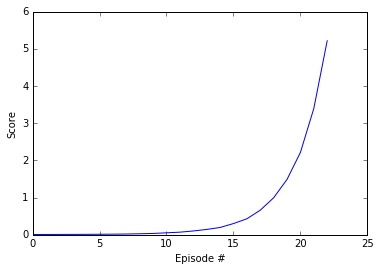

In [1310]:
plot(times)

In [1323]:
x = np.arange(23)
y = times
z = np.polyfit(x,y,4)
f = np.poly1d(z)

In [1326]:
x_new = np.linspace(23,81,50)
y_new = f(x_new)

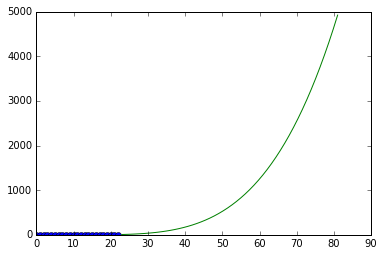

In [1327]:
plt.plot(x,y,'o',x_new,y_new)
plt.show()

In [1329]:
print(f(79))

4400.52957325
